<a href="https://colab.research.google.com/github/rhapis97/Practice_AI/blob/main/20210629_Lenet_basic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
%load_ext tensorboard

import datetime
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, AveragePooling2D, Dropout

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [18]:
num_classes = 2    # 개, 고양이 분류(이진 분류)

class Lenet(Sequential):
  def __init__(self, input_shape, nb_classes):
    super().__init__()    # 상속하겠다

    self.add(Conv2D(6, kernel_size=(5,5), strides=(1,1), activation='relu', input_shape=input_shape, padding='same'))    # 노드: 6개(필터 개수)
    self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))    # pool_size: 연산 범위
    self.add(Conv2D(16, kernel_size=(5,5), strides=(1,1), activation='relu', padding='valid'))
    self.add(AveragePooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
    self.add(Flatten())
    self.add(Dense(120, activation='relu'))
    self.add(Dense(84, activation='relu'))
    self.add(Dense(nb_classes, activation='softmax'))

    self.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [19]:
model = Lenet((100,100,3), num_classes)

In [20]:
model.summary()

Model: "lenet_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 100, 100, 6)       456       
_________________________________________________________________
average_pooling2d_2 (Average (None, 50, 50, 6)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 46, 46, 16)        2416      
_________________________________________________________________
average_pooling2d_3 (Average (None, 23, 23, 16)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8464)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 120)               1015800   
_________________________________________________________________
dense_4 (Dense)              (None, 84)                1016

In [21]:
from google.colab import files
file_uploaded = files.upload()

train_dir = "catanddot.zip"
!unzip catanddog.zip

Saving catanddog.zip to catanddog (1).zip
Archive:  catanddog.zip
replace train/Cat/0.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/Cat/0.jpg         
replace train/Cat/1.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/Cat/1.jpg         
replace train/Cat/10.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/Cat/10.jpg        
replace train/Cat/11.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: train/Cat/11.jpg        
replace train/Cat/12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: a
error:  invalid response [a]
replace train/Cat/12.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: train/Cat/12.jpg        
  inflating: train/Cat/13.jpg        
  inflating: train/Cat/14.jpg        
  inflating: train/Cat/15.jpg        
  inflating: train/Cat/16.jpg        
  inflating: train/Cat/17.jpg        
  inflating: train/Cat/18.jpg        
  inflating: train/Cat/19.jpg        
  inflating: train/Cat/2.jpg         
  inflating: trai

In [22]:
EPOCHS = 100
BATCH_SIZE = 32
image_height = 100
image_width = 100
train_dir = 'train/'
valid_dir = 'validation/'

In [23]:
train = ImageDataGenerator(
                  rescale=1./255,
                  rotation_range=10,
                  width_shift_range=0.1,
                  height_shift_range=0.1,
                  shear_range=0.1,
                  zoom_range=0.1)

train_generator = train.flow_from_directory(train_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=1,
                                            shuffle=True,
                                            class_mode="categorical")

valid = ImageDataGenerator(rescale=1.0/255.0)
valid_generator = valid.flow_from_directory(valid_dir,
                                            target_size=(image_height, image_width),
                                            color_mode="rgb",
                                            batch_size=BATCH_SIZE,
                                            seed=7,
                                            shuffle=True,
                                            class_mode='categorical')

train_num = train_generator.samples
valid_num = valid_generator.samples

Found 385 images belonging to 2 classes.
Found 98 images belonging to 2 classes.


In [24]:
log_dir="./log6-1/"     
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, profile_batch = 0)

In [25]:
# 학습
model.fit(train_generator, 
          epochs=EPOCHS, 
          steps_per_epoch=train_num // BATCH_SIZE,    # 파라미터 1회 업데이트 할 때마다 개수 지정하는 옵션
          validation_data=valid_generator,
          callbacks=[tensorboard_callback],
          verbose=1)

Epoch 1/100
12/12 [==============================] - 7s 529ms/step - loss: 0.7053 - accuracy: 0.4922 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/100
12/12 [==============================] - 7s 533ms/step - loss: 0.6879 - accuracy: 0.5382 - val_loss: 0.6865 - val_accuracy: 0.5000
Epoch 3/100
12/12 [==============================] - 7s 558ms/step - loss: 0.6841 - accuracy: 0.5312 - val_loss: 0.6967 - val_accuracy: 0.5000
Epoch 4/100
12/12 [==============================] - 7s 556ms/step - loss: 0.6732 - accuracy: 0.5911 - val_loss: 0.6836 - val_accuracy: 0.5204
Epoch 5/100
12/12 [==============================] - 6s 475ms/step - loss: 0.6515 - accuracy: 0.5949 - val_loss: 0.7302 - val_accuracy: 0.5204
Epoch 6/100
12/12 [==============================] - 6s 473ms/step - loss: 0.6730 - accuracy: 0.5836 - val_loss: 0.6621 - val_accuracy: 0.5816
Epoch 7/100
12/12 [==============================] - 6s 530ms/step - loss: 0.6371 - accuracy: 0.6317 - val_loss: 0.6671 - val_accuracy: 0.6020

verbose
- 0: 훈련과정 출력 안함
- 1: 훈련과정 막대로 표시
- 2: 미니 배치마다 훈련 정보 출력

In [26]:
class_names = ['cat','dog']
validation, label_batch = next(iter(valid_generator))
prediction_values = model.predict_classes(validation)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


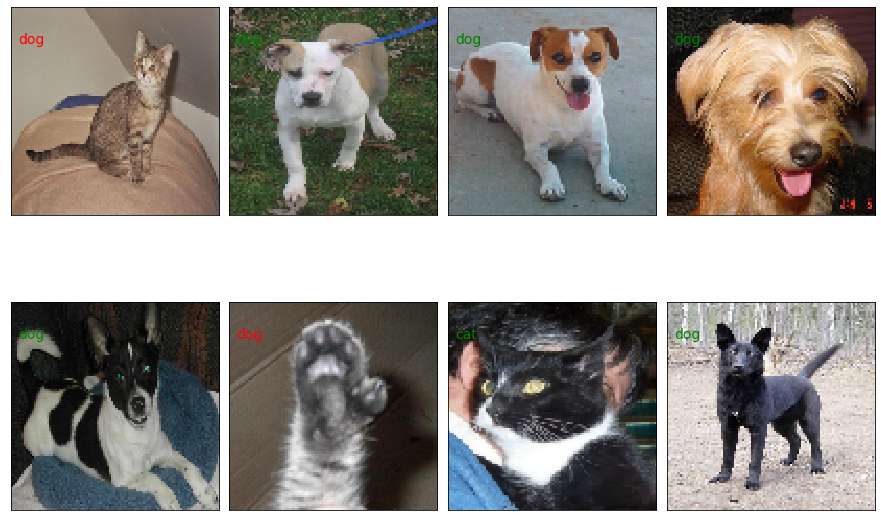

In [30]:
fig = plt.figure(figsize=(12,8))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

for i in range(8):
  ax = fig.add_subplot(2, 4, i+1, xticks=[], yticks=[])
  ax.imshow(validation[i, :], cmap=plt.cm.gray_r, interpolation='nearest')    # interpolation='nearest': 상호작용 - 근처에 있는 것만

  # 올바르게 예측할 때: green, 틀리게 예측: red
  if prediction_values[i] == np.argmax(label_batch[i]):
    ax.text(3, 17, class_names[prediction_values[i]], color='green', fontsize=14)
  else:
    ax.text(3, 17, class_names[prediction_values[i]], color='red', fontsize=14)